In [4]:
# 利用随机森林进行多变量时序预测欺骗干扰

# 导入库
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# 导入数据集
dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/9在第一位.csv')
 
print(dataset.describe())#查看数据概述

              count       gpsPdop      gpsNumSv       gpsWeek          itow  \
count  13828.000000  13828.000000  13828.000000  13828.000000  1.382800e+04   
mean     116.196722      4.452366     18.793002   2181.948076  3.646376e+08   
std       72.814751     19.907183     10.137855      6.920760  9.116327e+07   
min        0.000000      1.000000      0.000000   2176.000000  1.888924e+08   
25%       49.000000      1.000000     10.000000   2176.000000  2.900716e+08   
50%      115.000000      2.500000     16.000000   2176.000000  4.385198e+08   
75%      181.000000      2.500000     30.000000   2190.000000  4.389778e+08   
max      255.000000    200.000000     32.000000   2190.000000  4.397520e+08   

             gpsSec  P_Sol_Status      Pos_Type  AvionicsTemp    MainPowerV  \
count  13828.000000  13828.000000  13828.000000  13828.000000  13828.000000   
mean    3544.104525      2.156499     30.114692     36.704917     24.583977   
std     2520.235719      4.748022     16.554109    

In [8]:
#拆分数据集

#将数据集拆分为独立变量和因变量
from sklearn.model_selection import train_test_split
X = dataset[dataset.columns[:-1]]   #从0到倒数第一列
y = dataset.Jammer                  #只包括data的y这一列

#将数据集分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90) #测试集占训练集30%

In [9]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=64)#改写为自变量的维度值


#数据的标准化
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)
print(sum(var_ratio))

[[-0.46190804 -0.17049625  1.29386172 ... -1.15622786  0.
   0.        ]
 [ 1.26061141 -0.17049625  1.19518748 ... -1.41246503  0.
   0.        ]
 [ 0.91884168 -0.17049625  1.19518748 ... -1.48695258  0.
   0.        ]
 ...
 [-0.21583383 -0.17049625  1.19518748 ... -0.86423667  0.
   0.        ]
 [ 0.46770563 -0.17049625  1.19518748 ... -2.42549569  0.
   0.        ]
 [ 0.33099774 -0.09289388 -0.77829723 ... -0.03891463  0.
   0.        ]]
[2.33636189e+01 3.16481823e+00 3.02778473e+00 2.43763011e+00
 2.10404435e+00 1.91278342e+00 1.71511475e+00 1.55967660e+00
 1.45982434e+00 1.34263411e+00 1.17987743e+00 1.09983748e+00
 1.07419490e+00 1.00731549e+00 9.95053045e-01 8.73105960e-01
 8.52617386e-01 7.99522995e-01 7.24150956e-01 6.97719900e-01
 6.47256832e-01 5.97848648e-01 5.20372082e-01 4.86638282e-01
 4.55091336e-01 4.23703935e-01 3.75908842e-01 3.57009876e-01
 3.34784077e-01 3.27172481e-01 3.00872119e-01 2.79316153e-01
 2.61974755e-01 2.40663804e-01 2.27165480e-01 1.63959435e-01
 1.4787

In [5]:
##可视化方差比例
#fig2 = plt.figure(figsize=(10,5))
#plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14],var_ratio)
##plt.bar([1,2,3,4,5],var_ratio)
#plt.xlabel('Components')
#plt.ylabel('Variance ratio')
#plt.show()

(9679, 25) (9679, 64)
[0.4027794  0.05456019 0.05219779 0.04202376 0.03627288 0.03297562
 0.02956789 0.0268882  0.02516678 0.02314647 0.02034061 0.01896075
 0.01851869 0.01736567 0.01715431 0.01505187 0.01469876 0.01378335
 0.01248386 0.01202839 0.01115824 0.01030667 0.00896055 0.00838942
 0.00783243]
<class 'numpy.ndarray'>
0.9329000000000001


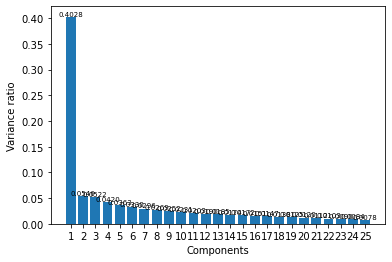

In [10]:
# 训练集数据降维到25维
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape,X_norm.shape)

# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 26))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
                                   "16","17","18","19","20","21","22","23","24","25"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

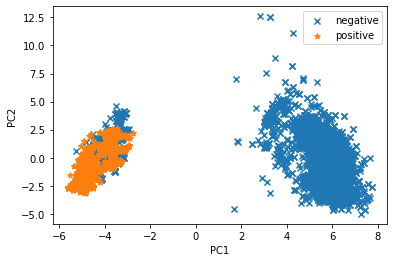

In [11]:
#降维数据的可视化
fig3 = plt.figure()
plt.scatter(X_train_pca[:,0][y_train==0],X_train_pca[:,1][y_train==0],marker='x',label='negative')
plt.scatter(X_train_pca[:,0][y_train==1],X_train_pca[:,1][y_train==1],marker='*',label='positive')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

最大得分为：0.9960738460092131
子树数量为：151


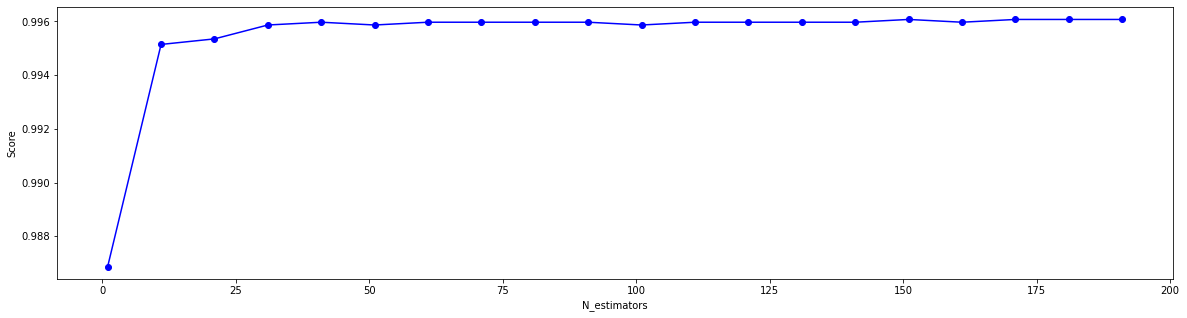

In [12]:
#确定随机深林数目、建模并调参
#n_estimators是影响程度最大的参数，首先对其进行调整：
scorel = []
for i in range(0,200,10):      #从[0,200)只取能被10整除的数
	#第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何引起模型整体准确率的变化
    rfc = RandomForestClassifier(n_estimators=i+1,   #森林里（决策）树的数目。   #criterion: ”gini” or “entropy”(default=”gini”)是计算属性的gini(基尼不纯度)还是entropy(信息增益)，来选择最合适的节点。
                                    n_jobs=-1,			#用于拟合和预测的并行运行的工作（作业）数量。因为可以并行从而提高性能。1=不并行；n：n个并行；-1：CPU有多少core，就启动多少job
                                    random_state=90)
    score = cross_val_score(rfc,X_train_pca,y_train,cv=10).mean()    #过传入的模型，训练十次，最后将十次结果求平均值。将每个数据集都算一次
     #交叉验证用于评估模型的预测性能，尤其是训练好的模型在新数据上的表现，可以在一定程度上减小过拟合。
    scorel.append(score)
print('最大得分为：{}'.format(max(scorel)))
a = (scorel.index(max(scorel))*10)+1
print('子树数量为：{}'.format(a))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel,color="blue", linewidth=1.5, marker = 'o')
plt.xlabel("N_estimators")
plt.ylabel("Score")
plt.show()

最大得分为：0.9960738460092131
子树数量为：146


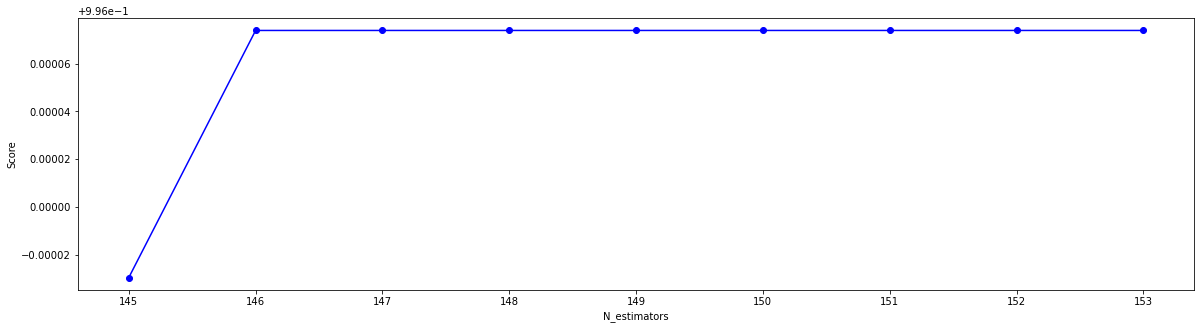

In [13]:
#调参第二步：细化学习曲线    放大部分内容
scorel = []
for i in range(145,154):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,X_train_pca,y_train,cv=10).mean()
    scorel.append(score)
print('最大得分为：{}'.format(max(scorel)))
a = ([*range(145,154)][scorel.index(max(scorel))])
print('子树数量为：{}'.format(a))
plt.figure(figsize=[20,5])
plt.plot(range(145,154),scorel,color="blue", linewidth=1.5, marker = 'o')
plt.xlabel("N_estimators")
plt.ylabel("Score")
plt.show()

In [14]:
#网格搜索法确定其他参数
# 调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
print(" 11 ", param_grid)
 
rfc = RandomForestClassifier(n_estimators=146
                            ,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X_train_pca,y_train)
print(GS.best_params_,":",GS.best_score_)

 11  {'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}
{'max_depth': 16} : 0.9960738460092131


In [15]:
#降维后的模型建立与训练
#from sklearn.linear_model import LogisticRegression
PCA_RF = RandomForestClassifier(n_estimators=146, max_depth=16, random_state=90)
PCA_RF.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=16, n_estimators=146, random_state=90)

In [16]:
#测试集数据降维到25维
pca = PCA(n_components=25)

X_norm = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_norm)

print(X_test_pca)
print(X_test_pca.shape)

[[-3.90562214 -0.8039289  -2.655876   ... -0.9329484  -0.10325898
   0.11009451]
 [-3.68892592  1.09371959 -0.82596093 ...  0.4411619   0.24306898
   0.14550452]
 [ 3.39936139  1.4906546   2.04084638 ... -1.35792787  0.56202029
   0.28591025]
 ...
 [-3.7658833   1.13333572 -1.14842372 ...  0.35898335  0.25701053
   0.24511819]
 [-3.83974541  0.98037453 -0.90100952 ...  0.52979134  0.3188711
   0.29394871]
 [ 5.18835709  1.49535003  1.7543666  ... -0.40838506  0.02821513
  -0.32318785]]
(4149, 25)


In [17]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict_pca = PCA_RF.predict(X_test_pca)
print(y_predict_pca)
print(y_predict_pca.shape)
accuracy_pca = accuracy_score(y_test,y_predict_pca)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(y_test,y_predict_pca)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(y_test,y_predict_pca)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(y_test,y_predict_pca)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

[1 1 0 ... 1 0 0]
(4149,)
PCA测试集准确率: 0.9115


PCA测试集精确率: 0.9257


PCA测试集召回率: 0.8991


PCA测试集F1值: 0.9122


In [18]:
#制作PCA混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_pca)
print(cm)

[[1875  153]
 [ 214 1907]]


In [19]:
#从混淆矩阵中寻找准确性。
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('正确预测值的数量: ', corrPred)
print('错误预测值的数量: ', falsePred)
#print ('\n\nKNN分类器的准确率为: ', corrPred/(cm.sum()))

正确预测值的数量:  3782
错误预测值的数量:  367


In [20]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test, y_predict_pca,digits=4))

              precision    recall  f1-score   support

           0     0.8976    0.9246    0.9109      2028
           1     0.9257    0.8991    0.9122      2121

    accuracy                         0.9115      4149
   macro avg     0.9116    0.9118    0.9115      4149
weighted avg     0.9120    0.9115    0.9116      4149



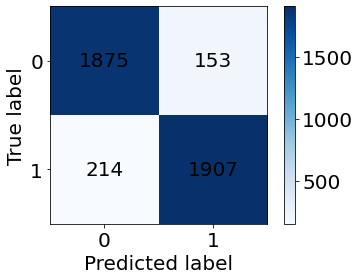

In [21]:
classes = list(set(y))
classes.sort()
confusion = confusion_matrix(y_predict_pca, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes, fontsize=20)
plt.yticks(indices, classes, fontsize=20)
plt.colorbar().ax.tick_params(labelsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],
                 va='center', ha='center',fontsize=20, )

plt.show()

In [22]:
# K折交叉验证模块 
from sklearn.model_selection import cross_val_score 
#使用K折交叉验证模块  
#scores = cross_val_score(nvclassifier, X_test, y_test, cv=10, scoring='accuracy')  
scores = cross_val_score(PCA_RF, X_test_pca, y_test, cv=10,scoring='accuracy')  

scores = np.around(scores,decimals=4)

#将10次的预测准确率打印出  
print('10折交叉验证准确率：',scores)  
# [0.92 1.   0.83 0.88 0.91 0.96 1.   1.   0.78 0.74]
#将10次的预测准确平均率打印出0.901630434782608  

scoresmean = np.around(scores.mean(),decimals=4)

print('\n\n10折交叉验证平均准确率：',scoresmean)

10折交叉验证准确率： [0.9952 1.     0.9904 0.9976 0.9831 0.9928 0.9952 0.9952 0.9952 0.9952]


10折交叉验证平均准确率： 0.994


In [23]:
precision = cross_val_score(PCA_RF, X_test_pca, y_test, cv=10,scoring='precision') 

precision = np.around(precision,decimals=4)

print('10折交叉验证精确率：',precision)

precisionmean = np.around(precision.mean(),decimals=4)

print('\n\n10折交叉验证平均精确率：',precisionmean)

10折交叉验证精确率： [0.9953 1.     0.9952 0.9953 0.9904 1.     0.9907 1.     0.9907 0.9953]


10折交叉验证平均精确率： 0.9953


In [24]:
recall = cross_val_score(PCA_RF, X_test_pca, y_test, cv=10,scoring='recall') 

recall = np.around(recall,decimals=4)

print('10折交叉验证精确率：',recall)

recallmean = np.around(recall.mean(),decimals=4)

print('\n\n10折交叉验证平均召回率：',recallmean)

10折交叉验证精确率： [0.9953 1.     0.9858 1.     0.9764 0.9858 1.     0.9906 1.     0.9953]


10折交叉验证平均召回率： 0.9929


In [25]:
f1 = cross_val_score(PCA_RF, X_test_pca, y_test, cv=10,scoring='f1') 

f1 = np.around(f1,decimals=4)

print('10折交叉验证f1值：',f1)

f1mean = np.around(f1.mean(),decimals=4)

print('\n\n10折交叉验证平均f1值：',f1mean)

10折交叉验证f1值： [0.9953 1.     0.9905 0.9976 0.9834 0.9929 0.9953 0.9953 0.9953 0.9953]


10折交叉验证平均f1值： 0.9941


In [26]:
roc_auc = cross_val_score(PCA_RF,  X_test_pca, y_test, cv=10,scoring='roc_auc') 

roc_auc = np.around(roc_auc,decimals=4)

print('10折交叉验证roc_auc值：',roc_auc)

roc_auc = np.around(roc_auc.mean(),decimals=4)

print('\n\n10折交叉验证平均ROC_AUC值：',roc_auc.mean())

10折交叉验证roc_auc值： [0.9999 1.     0.9999 1.     0.9997 0.9997 1.     0.9998 1.     0.9997]


10折交叉验证平均ROC_AUC值： 0.9999


[0 1]


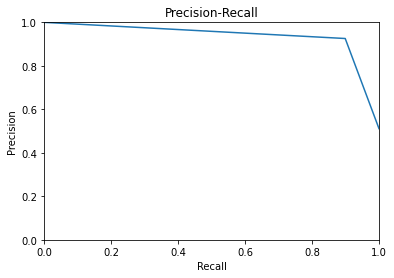

In [27]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, y_predict_pca) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()